In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1=pd.read_csv('train_titan.csv', header=0, encoding='latin-1')
d1.head()

d1.isnull().sum()
d1 = d1.dropna()
d1.isnull().sum()
d1.drop('Cabin', axis = 1, inplace = True)

print(d1.dtypes)
print(d1["Age"].describe())


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object
count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64


In [ ]:
d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


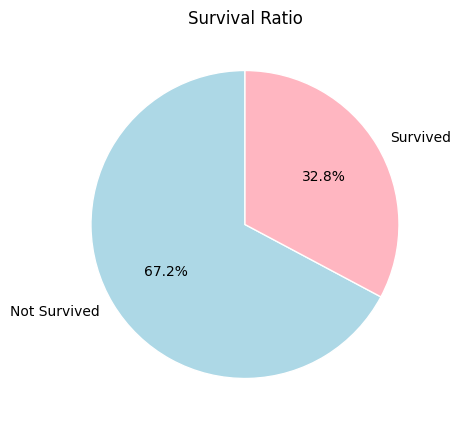

In [ ]:
# survied based on sex now pe chart
count = d1['Survived'].value_counts()
plt.figure(figsize=(5,5))
color=['lightblue', 'lightpink']
ex=[0.0,0.0]
label=['Not Survived', 'Survived']
plt.pie(count, labels=label, startangle=90, autopct='%1.1f%%', explode=ex, colors=color, wedgeprops={'edgecolor':'white'})
plt.title('Survival Ratio')
plt.show()

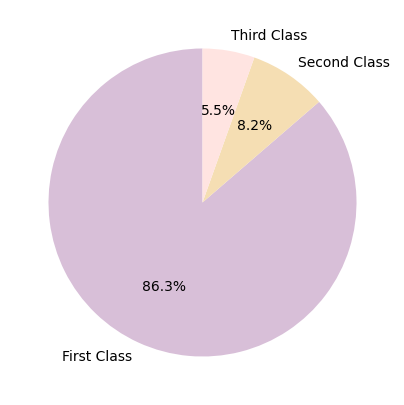

In [ ]:
first_class = (d1['Pclass']==1).sum()
second_class =(d1['Pclass']==2).sum()
third_class =(d1['Pclass']==3).sum()
plt.figure(figsize=(5,5))
color=['thistle', 'Wheat', 'mistyrose']
plt.pie([first_class, second_class, third_class], labels=['First Class', 'Second Class', 'Third Class'],colors=color, autopct='%1.1f%%', startangle=90)
plt.show()

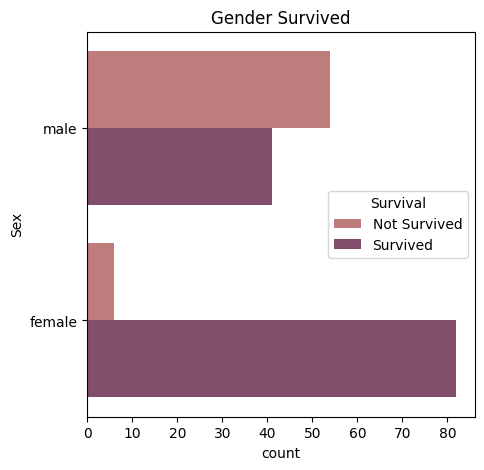

In [ ]:
plt.figure(figsize=(5,5))
o=['male', 'female']
sns.countplot(y='Sex', hue='Survived', data=d1, palette='flare', saturation=0.5, order=o)
plt.title('Gender Survived')
plt.legend(title='Survival', labels=['Not Survived', 'Survived'])
plt.show()

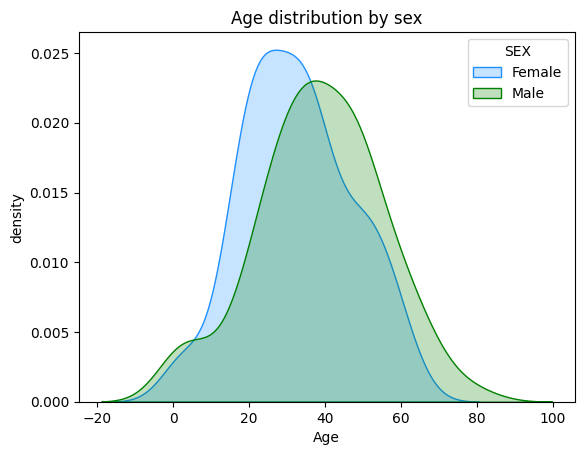

In [ ]:
sns.kdeplot(d1[d1['Sex']=='female']['Age'],color='dodgerblue', fill=True, label='Female')
sns.kdeplot(d1[d1['Sex']=='male']['Age'],color='green', fill=True, label='Male')

plt.title('Age distribution by sex')
plt.xlabel('Age')
plt.ylabel('density')
plt.legend(title='SEX')
plt.show()

FamilySize
0    79
1    61
2    28
3     9
4     2
5     4
Name: count, dtype: int64


<ipython-input-8-10077410de4c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FamilySize', palette='flare', data=d1) # Reference the column within the DataFrame


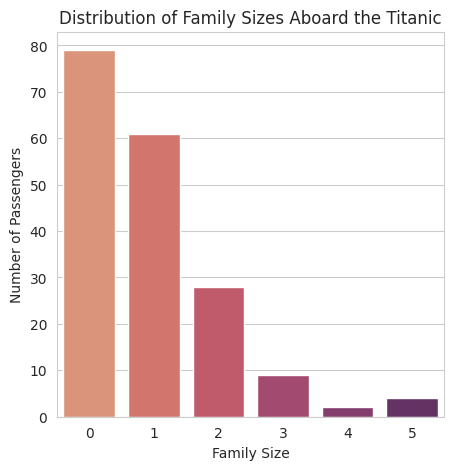

In [ ]:
d1['FamilySize'] = d1['SibSp'] + d1['Parch']
fam_distribution=d1['FamilySize'].value_counts().sort_index()
print(fam_distribution)
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x='FamilySize', palette='flare', data=d1) # Reference the column within the DataFrame
plt.title('Distribution of Family Sizes Aboard the Titanic')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.show()

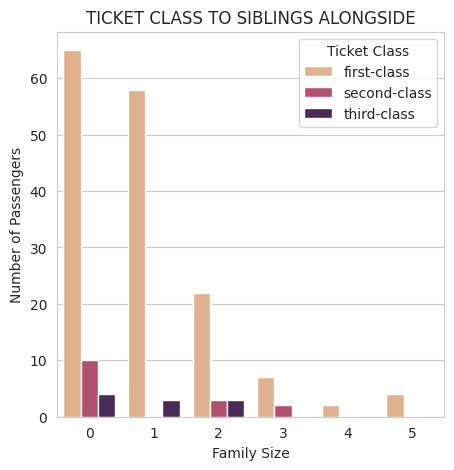

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x='FamilySize', palette='flare', data=d1, hue='Pclass')
plt.title('TICKET CLASS TO SIBLINGS ALONGSIDE')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.legend(['first-class','second-class','third-class'], title='Ticket Class')
plt.show()

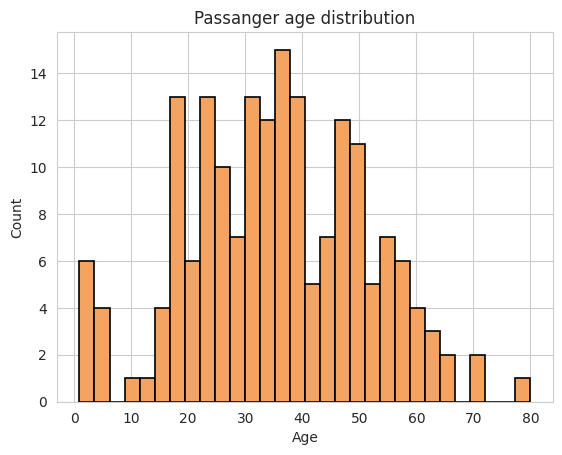

In [ ]:
plt.title('Passanger age distribution')
plt.hist(x='Age', bins=30, data=d1, color='sandybrown', edgecolor='black', linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

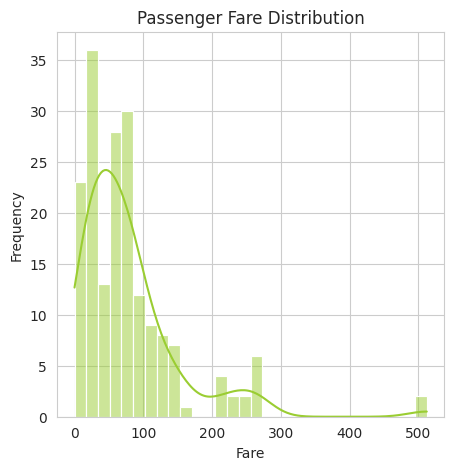

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(d1['Fare'], kde=True, bins=30, color='yellowgreen')
plt.title('Passenger Fare Distribution')
plt.ylabel('Frequency')
plt.xlabel('Fare')
plt.show()

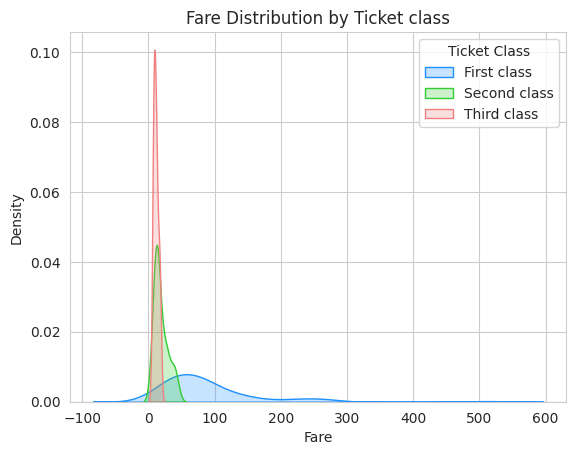

In [ ]:
sns.kdeplot(d1[d1['Pclass']==1]['Fare'], color='dodgerblue', label='First class', fill=True)
sns.kdeplot(d1[d1['Pclass']==2]['Fare'], color='limegreen', label='Second class', fill=True)
sns.kdeplot(d1[d1['Pclass']==3]['Fare'], color='lightcoral', label='Third class', fill=True)
plt.title('Fare Distribution by Ticket class')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Ticket Class')
plt.show()

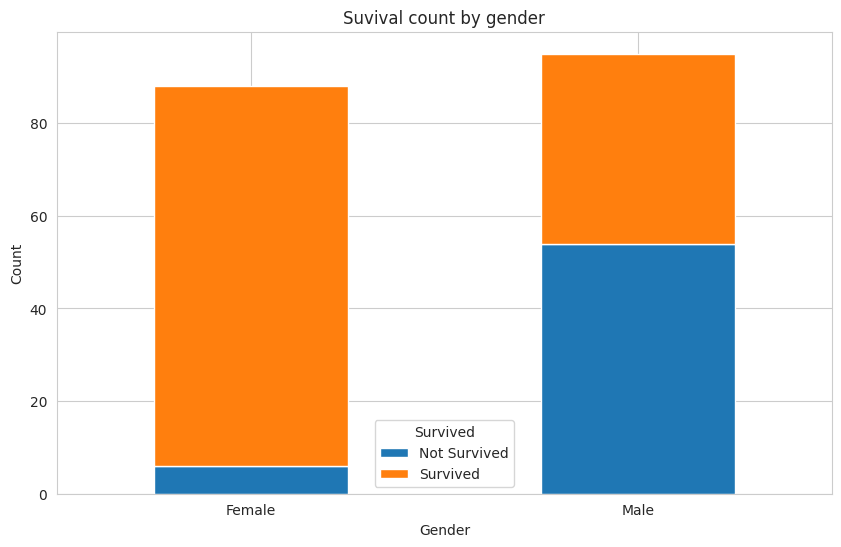

In [ ]:
contingency_table=pd.crosstab(d1['Sex'], d1['Survived'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Suvival count by gender')
plt.xlabel('Gender')
plt.xticks(np.arange(2),['Female', 'Male'], rotation=0)
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


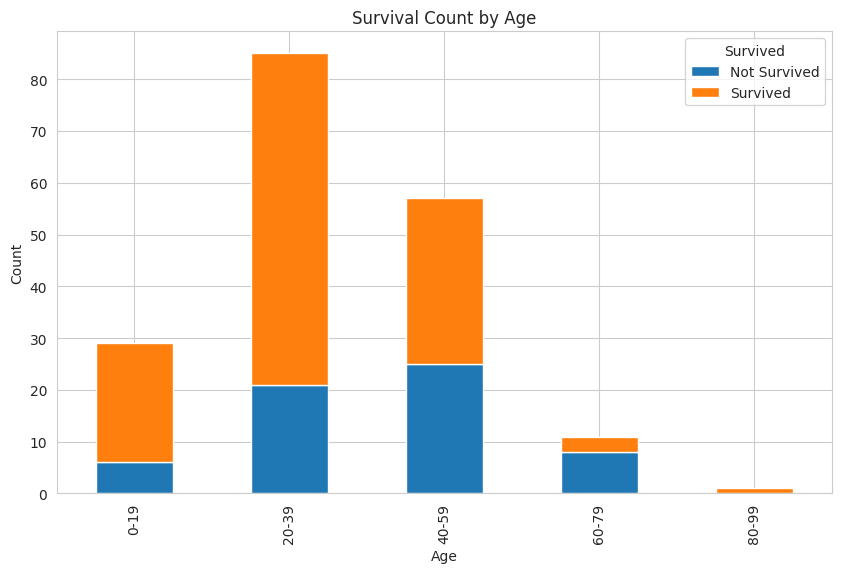

In [ ]:

max_age = int(d1['Age'].max()) + 1

# Create age bins of 20 years
bins = range(0, max_age + 20, 20)
labels = [f'{i}-{i+19}' for i in bins[:-1]]
d1['AgeGroup'] = pd.cut(d1['Age'], bins=bins, labels=labels, right=False)

# Create a contingency table
contingency_table = pd.crosstab(d1['AgeGroup'], d1['Survived'])
#contingency_table = pd.crosstab(d1['Age'], d1['Survived'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

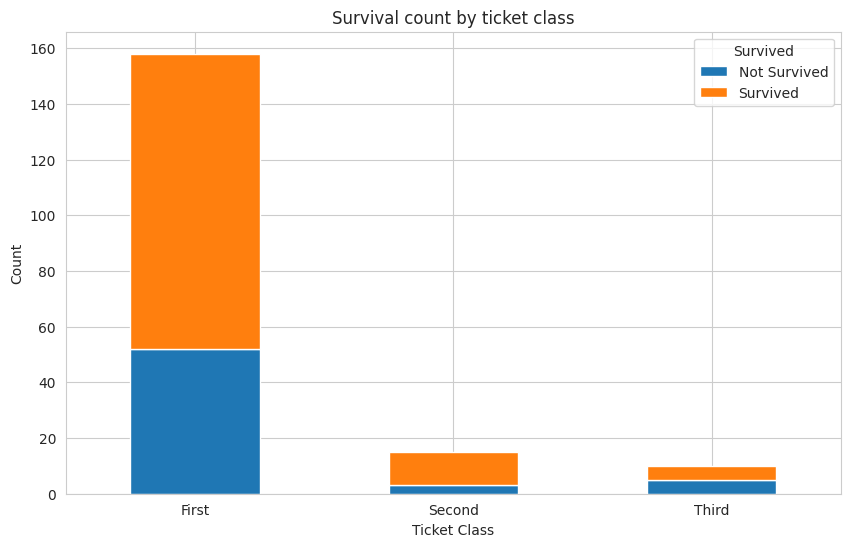

In [ ]:
contingency_table=pd.crosstab(d1['Pclass'], d1['Survived'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Survival count by ticket class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.xticks(np.arange(3),['First', 'Second', 'Third'], rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

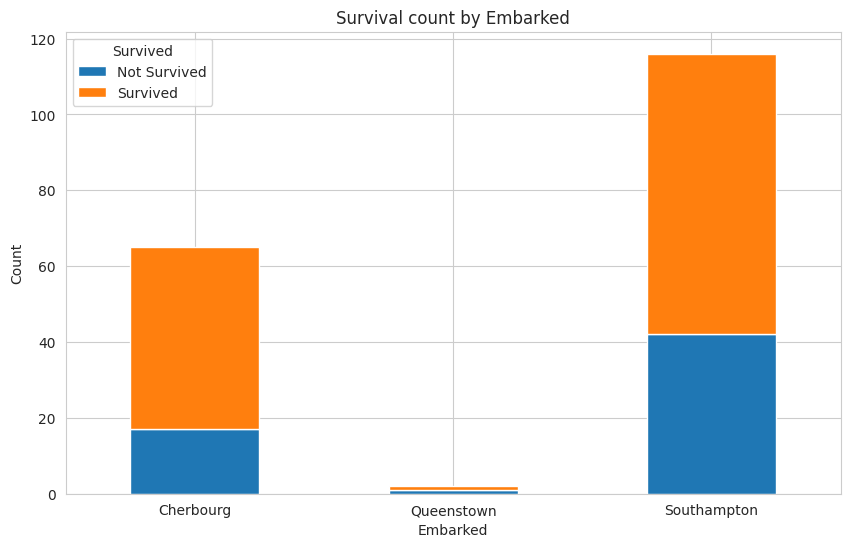

In [ ]:
contingency_table=pd.crosstab( d1['Embarked'], d1['Survived'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Survival count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(np.arange(3),['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()